In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from keras.models import Sequential
from keras.layers import Conv2D, Dropout, BatchNormalization, Flatten, Dense, MaxPooling2D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam

from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
print ("done")

done


In [44]:
df = pd.read_csv('age_gender.csv')

In [45]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,23705.0,33.300907,19.885708,1.0,23.0,29.0,45.0,116.0
ethnicity,23705.0,1.269226,1.345638,0.0,0.0,1.0,2.0,4.0
gender,23705.0,0.477283,0.499494,0.0,0.0,0.0,1.0,1.0


C:\Users\Fardin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


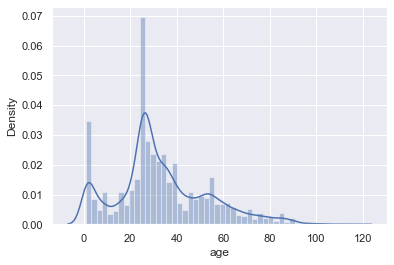

In [47]:
# Age
sns.distplot(df['age']);

C:\Users\Fardin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


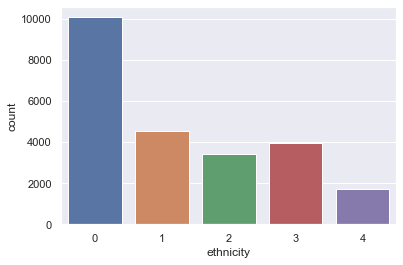

In [48]:
# Ethnicity
sns.countplot(df['ethnicity']);

In [49]:
#Actually imaeges in dataset are in string format, let's transform it in more useful type of data.
df['pixels'] = df['pixels'].map(lambda x: np.array(x.split(' '), dtype=np.float32).reshape(48, 48))
print ("Done")

Done


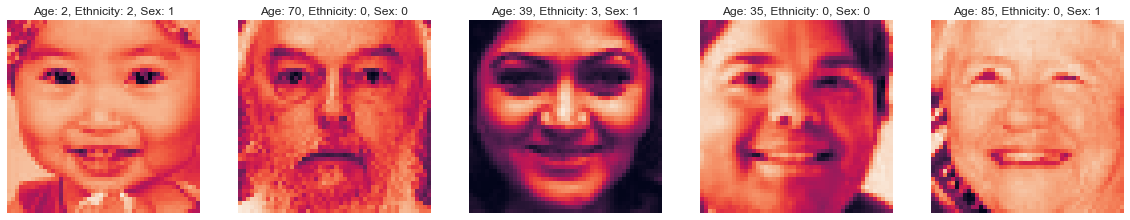

In [96]:
# Plot some pictures
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

for i in range(5):
    random_face = np.random.choice(len(df))
    
    age = df['age'][random_face]
    ethnicity = df['ethnicity'][random_face]
    gender = df['gender'][random_face]
    
    axes[i].set_title('Age: {0}, Ethnicity: {1}, Sex: {2}'.format(age, ethnicity, gender))
    axes[i].imshow(df['pixels'][random_face])
    axes[i].axis('off')

In [51]:
# Reshape images for CNN
X = np.array(df['pixels'].to_list())
X_reshaped = X.reshape(X.shape[0], 48, 48, 1)
print("Done")

Done


In [52]:
#Age prediction
#So let's start with age prediction.
# Set y
y = df['age'].values
print ("Done")

Done


In [53]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)
print("Done")

Done


In [55]:
age_model = Sequential()
age_model.add(Conv2D(64, kernel_size=(3,3), input_shape= (48,48,1), activation='relu'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(BatchNormalization())

age_model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
age_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(Dropout(0.3))
age_model.add(BatchNormalization())

age_model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
age_model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(Dropout(0.3))
age_model.add(BatchNormalization())

age_model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(Dropout(0.5))
age_model.add(BatchNormalization())

age_model.add(Flatten())
age_model.add(Dense(128, activation='relu'))
age_model.add(Dropout(0.4))
age_model.add(Dense(1))

age_model.compile(optimizer='adam', loss='mse')

age_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 23, 23, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_11 (Conv2D)          (None, 23, 23, 128)       73856     
                                                                 
 conv2d_12 (Conv2D)          (None, 21, 21, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)    

In [57]:
# Callbacks for age model
callbacks = [EarlyStopping(patience=4, monitor='val_loss', mode='min'), 
             ReduceLROnPlateau(patience=2, verbose=1)]
print("Done")

Done


In [59]:
history = age_model.fit(X_train, y_train, 
                        epochs=10,
                        batch_size=64,
                        callbacks=callbacks,
                        validation_data=(X_test, y_test))

Epoch 1/10
297/297 [==============================] - 1846s 6s/step - loss: 232.0382 - val_loss: 339.8120 - lr: 0.0010
Epoch 2/10
297/297 [==============================] - 1784s 6s/step - loss: 146.7835 - val_loss: 146.6593 - lr: 0.0010
Epoch 3/10
297/297 [==============================] - 1780s 6s/step - loss: 127.1237 - val_loss: 294.0682 - lr: 0.0010
Epoch 4/10
297/297 [==============================] - ETA: 0s - loss: 113.8569
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
297/297 [==============================] - 1789s 6s/step - loss: 113.8569 - val_loss: 394.9193 - lr: 0.0010
Epoch 5/10
297/297 [==============================] - 1815s 6s/step - loss: 91.5132 - val_loss: 117.9625 - lr: 1.0000e-04
Epoch 6/10
297/297 [==============================] - 1911s 6s/step - loss: 86.7330 - val_loss: 76.2085 - lr: 1.0000e-04
Epoch 7/10
297/297 [==============================] - 1793s 6s/step - loss: 83.3462 - val_loss: 83.2387 - lr: 1.0000e-04
Epoch 8/10
297/

<AxesSubplot:>

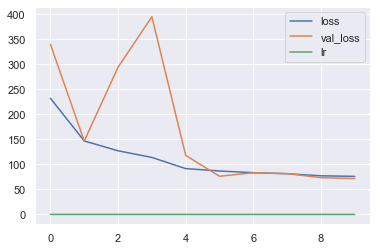

In [60]:
pd.DataFrame(history.history).plot()

In [61]:
valid_score = age_model.evaluate(X_test, y_test, verbose=1)

149/149 [==============================] - 117s 785ms/step - loss: 71.5088


In [62]:
# Make predictions 
y_pred = age_model.predict(X_test)

149/149 [==============================] - 123s 814ms/step


In [64]:
# Mean absolute error
print("MAE: {}".format(mean_absolute_error(y_test, y_pred)))

MAE: 6.045272867203362


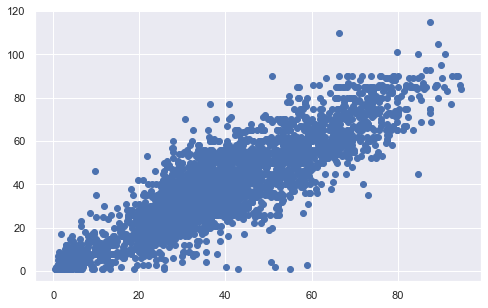

In [65]:
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, y_test);

In [21]:
#So, mean absolute error around 5.5 years it's not so super result considering mean age is 33, it's about 17%.

In [88]:
def face_prediction(image):
    
    x = image.reshape(1, 48, 48, 1)
    x = x / 255
    
    age_predict = int(age_model.predict(x))
    plt.imshow(image)
    plt.title('{0}'.format(age_predict) + ' Years Old')
    plt.axis('off')
print ("Done")

Done


1/1 [==============================] - 0s 85ms/step


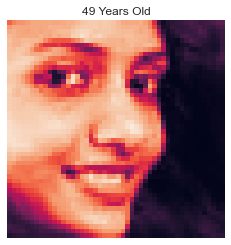

In [89]:
# Model prediction 
face_prediction(df['pixels'][random_face])

In [87]:
age_model.save('age_model.h5')
print("done")

done


In [69]:
#load the model
from tensorflow import keras
model = keras.models.load_model('age_model.h5')
print ("Done")

Done


In [22]:
#Gender prediction

In [23]:
# Set y
y = df['gender'].values

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)
gender_model = Sequential()

gender_model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2,2)))
gender_model.add(BatchNormalization())

gender_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
#gender_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2,2)))
gender_model.add(Dropout(0.4))
gender_model.add(BatchNormalization())

gender_model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
gender_model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2,2)))
gender_model.add(Dropout(0.5))
gender_model.add(BatchNormalization())

gender_model.add(Flatten())

gender_model.add(Dense(64, activation='relu'))
gender_model.add(Dropout(0.4))

gender_model.add(Dense(1, activation='sigmoid')) #For binary classification activation function is sigmoid 

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #...and loss function is binary_crossentropy

gender_model.summary()

NameError: name 'df' is not defined

In [24]:
# Callbacks for gender model
callbacks = [EarlyStopping(patience=4, monitor='val_accuracy', mode='max'), 
              ReduceLROnPlateau(patience=2, verbose=1)]

NameError: name 'EarlyStopping' is not defined

In [25]:
history = gender_model.fit(X_train, y_train, 
                           epochs=n_epochs,
                           batch_size=batch_size,
                           callbacks=callbacks,
                           validation_data=(X_test, y_test))

NameError: name 'gender_model' is not defined

In [26]:
# Metrics
valid_score = gender_model.evaluate(X_test, y_test, verbose=1)
print('Accuracy for test set: {0}'.format(valid_score[1]))

NameError: name 'gender_model' is not defined

In [27]:
y_pred = gender_model.predict_classes(X_test)

NameError: name 'gender_model' is not defined

In [28]:
print(classification_report(y_test, y_pred))

NameError: name 'classification_report' is not defined

In [29]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='Greens', cbar=False, annot=True, fmt='d');

NameError: name 'confusion_matrix' is not defined

In [30]:
#I suppose big part of this mistakes is children. Let's see some examples where's model had made mistake.

In [31]:
y_pred = y_pred.reshape(y_pred.shape[0])

NameError: name 'y_pred' is not defined

In [32]:
# Model predict is female, but actually it's male

X_fp = X_test[(y_pred == 1) & (y_test == 0)] 

fig, axes = plt.subplots(1, 5, figsize=(20, 10))

for i in range(5):
    
    random_choice = np.random.choice(len(X_fp))
    
    axes[i].imshow(X_fp[random_choice].reshape(48, 48))
    axes[i].axis('off')

NameError: name 'X_test' is not defined

In [33]:
# Model predict is male, but actually it's female

X_fn = X_test[(y_pred == 0) & (y_test == 1)]  

fig, axes = plt.subplots(1, 5, figsize=(20, 10))

for i in range(5):
    
    random_choice = np.random.choice(len(X_fn))
    axes[i].imshow(X_fn[random_choice].reshape(48, 48))
    axes[i].axis('off')

NameError: name 'X_test' is not defined

In [34]:
#So, on many photos difference between genders are not so clear.

In [35]:
#Ethnicity prediction

In [36]:
# Set y
y = df['ethnicity'].values

# Multiclass problem transform to one_hot_encoding
y = to_categorical(y, 5)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

NameError: name 'df' is not defined

In [37]:
eth_model = Sequential()

eth_model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
eth_model.add(MaxPooling2D(pool_size=(2,2)))
eth_model.add(BatchNormalization())

eth_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
eth_model.add(MaxPooling2D(pool_size=(2,2)))
eth_model.add(BatchNormalization())

eth_model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
eth_model.add(MaxPooling2D(pool_size=(2,2)))
eth_model.add(Dropout(0.5))
eth_model.add(BatchNormalization())

eth_model.add(Flatten())
eth_model.add(Dense(128, activation='relu'))
eth_model.add(Dropout(0.5))
eth_model.add(Dense(5, activation='softmax')) #For multiclass classification activation function is softmax 

eth_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #...and loss function is categorical_crossentropy

eth_model.summary()

NameError: name 'Sequential' is not defined

In [38]:
# Callbacks for ethnicity model
callbacks = [EarlyStopping(patience=4, monitor='val_accuracy', mode='max'), 
             ReduceLROnPlateau(patience=2, verbose=1)]

NameError: name 'EarlyStopping' is not defined

In [39]:
history = eth_model.fit(X_train, y_train, 
                         epochs=n_epochs,
                         batch_size=batch_size,
                         callbacks=callbacks,
                         validation_data=(X_test, y_test))

NameError: name 'eth_model' is not defined

In [40]:
valid_score = eth_model.evaluate(X_test, y_test, verbose=1)

NameError: name 'eth_model' is not defined

In [41]:
y_pred = eth_model.predict_classes(X_test)

NameError: name 'eth_model' is not defined

In [42]:
# Convert to 0 to 4 scale 
y_test_labels = [np.argmax(i) for i in y_test]

NameError: name 'y_test' is not defined

In [43]:
print(classification_report(y_test_labels, y_pred))

NameError: name 'classification_report' is not defined

In [44]:
# Confusion matrix
cm = confusion_matrix(y_test_labels, y_pred)

np.fill_diagonal(cm, 0) #Fill diagonal with 0 for better visualisation
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='Greens');

NameError: name 'confusion_matrix' is not defined

In [45]:
def face_prediction(image):
    
    x = image.reshape(1, 48, 48, 1)
    x = x / 255
    
    age_predict = int(age_model.predict(x))
    gender_predict = int(gender_model.predict_classes(x))
    ethnicity_predict = int(eth_model.predict_classes(x))
    
    gender = {0: 'Male', 1: 'Female'}
    eth_group = {0: 'White', 1: 'Black', 2: 'Asian', 3: 'Indian', 4: 'Other'} 
    
    plt.imshow(image)
    plt.title('{0}, {1}, {2}'.format(age_predict, gender[gender_predict], eth_group[ethnicity_predict]))
    plt.axis('off')

In [46]:
# Final check
random_face = np.random.choice(len(df))

age = df['age'][random_face]
ethnicity = df['ethnicity'][random_face]
gender = df['gender'][random_face]

plt.imshow(df['pixels'][random_face])
plt.title('Age: {0}, Sex: {1}, Ethnicity: {2},'.format(age, gender, ethnicity))
plt.axis('off');

NameError: name 'df' is not defined

In [47]:
# Model prediction 
face_prediction(df['pixels'][random_face])

NameError: name 'df' is not defined